In [1]:
import nibabel as nib
import numpy as np

In [2]:
#加载数据
fpath1= "C:/Users/pc_207/Desktop/2023a_cm" + "/T2.nii.gz"
img = nib.load(fpath1)

#加载mask
fpath2= "C:/Users/pc_207/Desktop/2023a_cm" + "/T2_mask.nii"
mask = nib.load(fpath2)

In [3]:
#获得分辨率基本信息
width,height,queue=img.dataobj.shape
pixdim = img.header["pixdim"]
print( "shape:",width,height,queue,"pixdim:",pixdim[1],pixdim[2],pixdim[3])

shape: 278 320 64 pixdim: 0.71875 0.71875 2.0


In [4]:
#获得数据
img_arr = img.dataobj[:, :, :]
mask_arr = mask.dataobj[:, :, :]

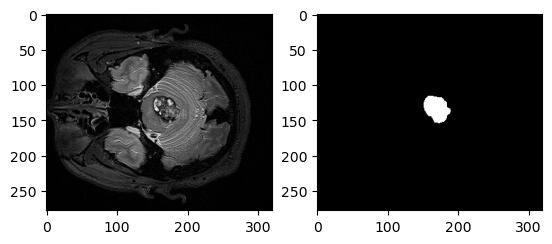

In [5]:
#查看
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(img_arr[:,:,15],cmap="gray")
plt.subplot(1,2,2)
plt.imshow(mask_arr[:,:,15],cmap="gray")

In [6]:
#对读出的数据进行改造
img_data = img.dataobj[:, :, :]
mask_data = mask.dataobj[:, :, :]

atom = 1#0.5#mm
s1,s2,s3=img.dataobj.shape
pixdim = img.header["pixdim"]
p1,p2,p3=pixdim[1],pixdim[2],pixdim[3]

ss1,ss2,ss3=mask.dataobj.shape
pixdim = mask.header["pixdim"]
pp1,pp2,pp3=pixdim[1],pixdim[2],pixdim[3]

#img与mask是否一致
if(s1==ss1 and s2==ss2 and s3==ss3 and p1==pp1 and p2==pp2 and p3==pp3):
    print("True")
    
#获得更改分辨率所用参数
print( s1,s2,s3,p1,p2,p3)
t1 = int((s1*p1/atom)+1)
t2 = int((s2*p2/atom)+1)
t3 = int((s3*p3/atom)+1)
print(t1,t2,t3)



True
278 320 64 0.71875 0.71875 2.0
200 231 129


In [7]:
from scipy.ndimage import zoom
output_shape = (t1,t2,t3)
img_data = zoom(img_data, output_shape / np.array(img_data.shape), order=3)
print("finish img")
mask_data = zoom(mask_data, output_shape / np.array(mask_data.shape), order=3)
print("finish mask")
mask_data[mask_data>0]=1
print("finish binarization")

finish img
finish mask
finish binarization


In [8]:
#保存并重新读取

new_img = nib.Nifti1Image(img_data, img.affine)
new_mask = nib.Nifti1Image(mask_data, img.affine)

nib.save(new_img, "./tp/T2.nii.gz")
nib.save(new_mask, "./tp/T2_mask.nii.gz")

In [9]:
new_img.shape

(200, 231, 129)

In [10]:
from radiomics import featureextractor
import six

#imageFile = fpath1
#maskFile = fpath2
imageFile = "./tp/T2.nii.gz"
maskFile = "./tp/T2_mask.nii.gz"

#确定提取的方式
extractor = featureextractor.RadiomicsFeatureExtractor(geometryTolerance = 1000)

#enableFeaturesByName 可以自己设置滤波器  默认只有original
#extractor.enableImageTypeByName()

# 不用挑选，直接全选
extractor.enableAllImageTypes() #这个会用到的#107-1490


#对图片进行提取
featureVector = extractor.execute(imageFile, maskFile, voxelBased=False) #如果为True生成的就不是数而是特征图

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 nee

In [11]:
#输出特征
num_f = 0
for k,v in six.iteritems(featureVector):
    if(k[0:11] == "diagnostics"):
        #如果输出的特征是diagnostics开头就不需要输出了
        continue
    print(k,":", v)#func(k,v)
    #df.loc[3, str(k)] = v############################
    num_f = num_f + 1
print("\n共产生",num_f,"个特征")

original_shape_Elongation : 0.37922317506377146
original_shape_Flatness : 0.2943002519802962
original_shape_LeastAxisLength : 14.775928364916988
original_shape_MajorAxisLength : 50.20698509597694
original_shape_Maximum2DDiameterColumn : 60.518664799072525
original_shape_Maximum2DDiameterRow : 60.15478080057694
original_shape_Maximum2DDiameterSlice : 22.38534069071503
original_shape_Maximum3DDiameter : 60.62527382192148
original_shape_MeshVolume : 9514.077987056226
original_shape_MinorAxisLength : 19.03965229847583
original_shape_Sphericity : 0.6709569926506783
original_shape_SurfaceArea : 3236.1892611392045
original_shape_SurfaceVolumeRatio : 0.3401474389364893
original_shape_VoxelVolume : 9545.762880261987
original_firstorder_10Percentile : 34.0
original_firstorder_90Percentile : 245.0
original_firstorder_Energy : 206968323.0
original_firstorder_Entropy : 3.6011942639338845
original_firstorder_InterquartileRange : 92.0
original_firstorder_Kurtosis : 4.629773663558465
original_firstord